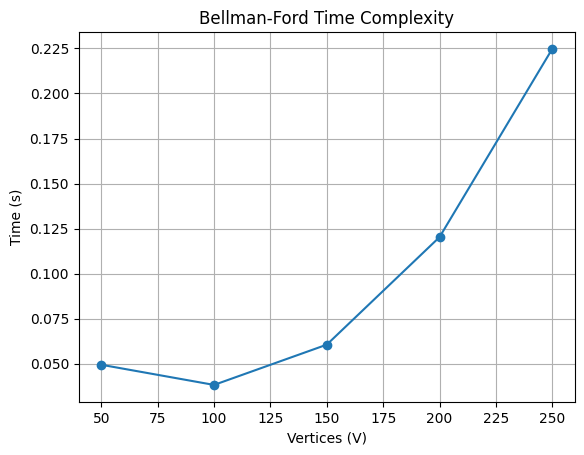

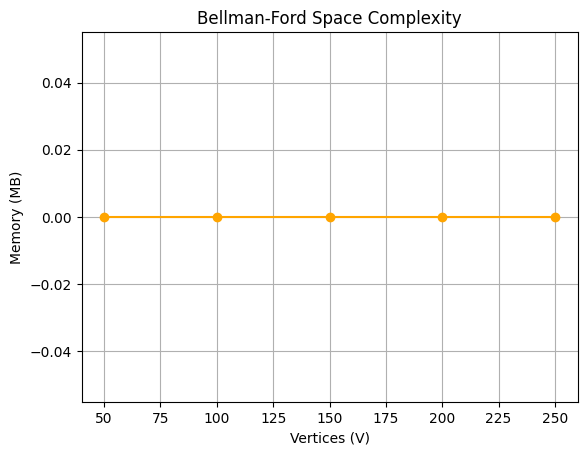

✅ Expected Time Complexity: O(V * E)
✅ Expected Space Complexity: O(V)


In [11]:
# === Problem 2: Route Finding (Bellman-Ford) ===
!pip install memory_profiler psutil matplotlib --quiet

import time, random
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def bellman_ford(V, edges, src):
    dist = [float('inf')] * V
    dist[src] = 0
    for _ in range(V - 1):
        for u, v, w in edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
    return dist

def generate_weighted_graph(V):
    edges = []
    for u in range(V):
        for v in range(V):
            if u != v and random.random() < 0.05:
                w = random.randint(-5, 15)
                edges.append((u, v, w))
    return edges

sizes, times, mems = [], [], []
for V in range(50, 300, 50):
    edges = generate_weighted_graph(V)
    start = time.time()
    mem_usage = memory_usage((bellman_ford, (V, edges, 0)), interval=0.1)
    times.append(time.time() - start)
    mems.append(max(mem_usage) - min(mem_usage))
    sizes.append(V)

plt.plot(sizes, times, marker='o'); plt.title("Bellman-Ford Time Complexity")
plt.xlabel("Vertices (V)"); plt.ylabel("Time (s)"); plt.grid(True); plt.show()

plt.plot(sizes, mems, marker='o', color='orange'); plt.title("Bellman-Ford Space Complexity")
plt.xlabel("Vertices (V)"); plt.ylabel("Memory (MB)"); plt.grid(True); plt.show()

print("✅ Expected Time Complexity: O(V * E)")
print("✅ Expected Space Complexity: O(V)")
